In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [53]:
barang = pd.read_csv('Dataset-barang-angkut.csv')
kota = pd.read_csv('dataset_lat-long_jatim.csv', sep=';')

In [4]:
barang.head()

,ID,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS
0,1,Kabupaten Bondowoso,Kabupaten Pacitan,15,1655000,GAS
1,2,Kabupaten Bondowoso,Kabupaten Pacitan,25,2005000,PADAT
2,3,Kabupaten Bondowoso,Kabupaten Pacitan,30,2180000,CAIR
3,4,Kabupaten Bondowoso,Kabupaten Ponorogo,15,1465000,GAS
4,5,Kabupaten Bondowoso,Kabupaten Ponorogo,25,1815000,PADAT


In [32]:
kota.head()

,ID,Daerah,Latitude,Longitude
0,1,Surabaya,"-7,263360277","112,7456592"
1,2,Probolinggo,"-7,743461818","113,2159045"
2,3,Pasuruan,"-7,641949693","112,906654"
3,4,Mojokerto,"-7,463309884","112,4317742"
4,5,Malang,"-7,982646369","112,6306718"


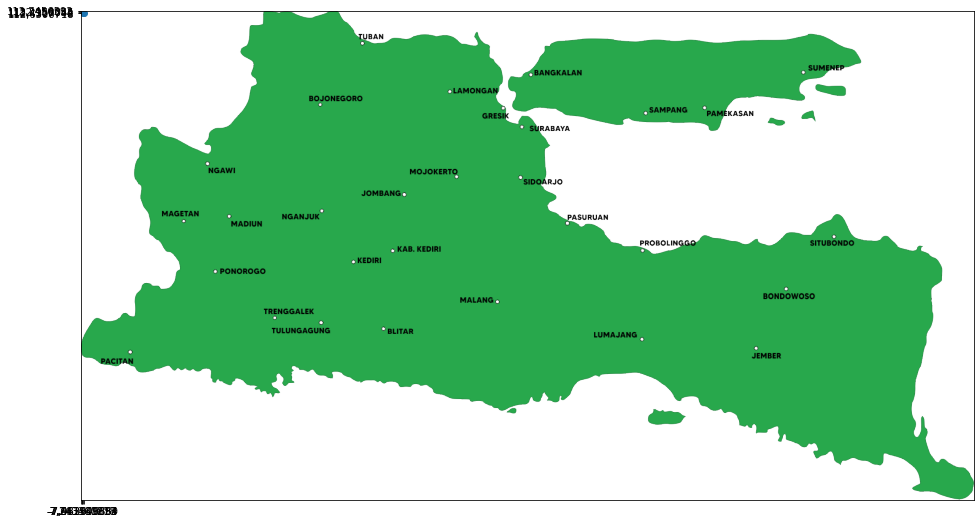

In [4]:
plt.figure(figsize=(16,9))
x = plt.imread('Assets/Peta Jawa Timur.png')
plt.imshow(x, aspect='auto', )

plt.scatter(kota['Latitude'][:5], kota['Longitude'][:5])
#plt.xticks(kota['Latitude'])
plt.show()

In [49]:
gs = gpd.GeoSeries.from_xy(kota['Longitude'], kota['Latitude'])
gdf = gpd.GeoDataFrame(kota, geometry=gs)
gdf


,ID,Daerah,Latitude,Longitude,geometry
0,1,Surabaya,-7.263360,112.745659,POINT (112.74566 -7.26336)
1,2,Probolinggo,-7.743462,113.215904,POINT (113.21590 -7.74346)
2,3,Pasuruan,-7.641950,112.906654,POINT (112.90665 -7.64195)
3,4,Mojokerto,-7.463310,112.431774,POINT (112.43177 -7.46331)
4,5,Malang,-7.982646,112.630672,POINT (112.63067 -7.98265)
5,6,Madiun,-7.629246,111.516911,POINT (111.51691 -7.62925)
6,7,Kediri,-7.826602,112.011025,POINT (112.01102 -7.82660)
7,8,Blitar,-8.098276,112.165292,POINT (112.16529 -8.09828)
8,9,Batu,-7.871129,112.526730,POINT (112.52673 -7.87113)
9,10,Tulungagung,-8.064680,111.900586,POINT (111.90059 -8.06468)


<AxesSubplot:>

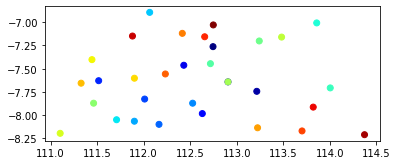

In [53]:
gdf.plot(cmap='jet')

In [37]:
kota['Latitude'] = kota['Latitude'].astype('string').str.replace(',','.').astype('float64')
kota['Longitude'] = kota['Longitude'].astype('string').str.replace(',','.').astype('float64')

In [29]:
kotaZ = kota.loc[kota['Daerah'] == 'Kediri']
kotaX = kota.loc[kota['Daerah'] == 'Surabaya']
KotaZX = pd.concat([kotaX,kotaZ])
KotaZX

,ID,Daerah,Latitude,Longitude
0,1,Surabaya,-7.263360,112.745659
6,7,Kediri,-7.826602,112.011025


TypeError: __init__() missing 1 required positional argument: 'locs'

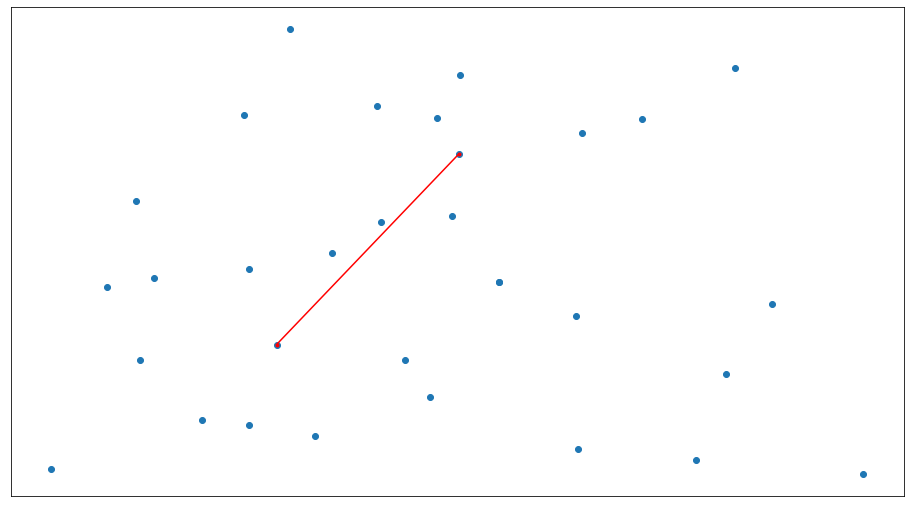

In [57]:
plt.figure(figsize=(16,9))

plt.scatter(kota['Longitude'], kota['Latitude'])
plt.plot(KotaZX['Longitude'], KotaZX['Latitude'], '.-r')
#plt.imshow(x)
# plt.xticks(kota['Latitude'])
# plt.yticks(kota['Longitude'])
plt.xticks([])
plt.yticks([])
#plt.savefig('Peta.png')
plt.show()

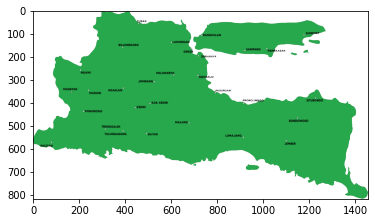

In [54]:
plt.imshow(x)

In [4]:
graph = {
    'Pacitan':set(['Ponorogo','Trenggalek']),
    'Trenggalek':set(['Ponorogo', 'Tulungagung']),
    'Tulungagung':set(['Trenggalek','Kediri','Blitar']),
    'Blitar':set(['Kediri','Tulungagung','Malang']),
    'Kediri':set(['Nganjuk','Jombang','Tulungagung','Batu','Blitar']),
    'Nganjuk':set(['Jombang','Kediri','Madiun']),
    'Batu':set(['Malang','Kediri']),
    'Malang':set(['Batu','Blitar','Pasuruan','Lumajang']),
    'Lumajang':set(['Malang','Probolinggo','Jember']),
    'Jember':set(['Lumajang','Bondowoso','Banyuwangi']),
    'Banyuwangi':set(['Jember']),
    'Bondowoso':set(['Jember','Situbondo']),
    'Situbondo':set(['Bondowoso','Probolinggo']),
    'Probolinggo':set(['Situbondo','Lumajang','Pasuruan']),
    'Pasuruan':set(['Sidoarjo','Malang','Probolinggo']),
    'Sidoarjo':set(['Mojokerto','Surabaya','Pasuruan']),
    'Mojokerto':set(['Jombang','Sidoarjo','Bojonegoro','Surabaya']),
    'Surabaya':set(['Gresik','Mojokerto','Sidoarjo','Bangkalan']),
    'Bangkalan':set(['Surabaya','Sampang']),
    'Sampang':set(['Bangkalan','Pamekasan']),
    'Pamekasan':set(['Sampang','Sumenep']),
    'Sumenep':set(['Pamekasan']),
    'Gresik':set(['Surabaya','Lamongan']),
    'Lamongan':set(['Gresik','Tuban']),
    'Tuban':set(['Lamongan','Bojonegoro']),
    'Bojonegoro':set(['Tuban','Ngawi']),
    'Ngawi':set(['Magetan','Madiun','Bojonegoro']),
    'Magetan':set(['Ngawi','Madiun']),
    'Madiun':set(['Ngawi','Magetan','Ponorogo','Nganjuk']),
    'Ponorogo':set(['Madiun','Pacitan','Trenggalek']),
    'Jombang':set(['Nganjuk','Kediri','Mojokerto'])
}

In [46]:
import math

def cekJalur(graph, asal, tujuan):
    queue = [[asal]]
    visited = set()

    while queue:
        jalur = queue.pop(0)
        state = jalur[-1]

        if state == tujuan:
            return jalur
        elif state not in visited:
            for cabang in graph.get(state, []):

                jalurAkhir = list(jalur)
                jalurAkhir.append(cabang)
                queue.append(jalurAkhir)
                
            visited.add(state)
        
        if len(queue) == 0:
            return 'Tidak Ditemukan'
        
    

In [19]:
awal = 'Kediri'
akhir = 'Surabaya'

if awal == akhir:
    print(wew)
else:
    print(':(')

:(


In [49]:
cekJalur(graph, 'Magetan', 'Surabaya')

['Magetan', 'Madiun', 'Nganjuk', 'Jombang', 'Mojokerto', 'Surabaya']

In [ ]:
def move(awal, akhir):
    x1 = kota.loc(kota['Daerah'] == awal)

    Canvas.move()

In [144]:
batasBensin = 90
rute = ['Kediri','Jombang','Mojokerto','Sidoarjo','Surabaya']

In [145]:
len(rute)

5

In [147]:
def HitungJarak(asal, tujuan):
    #Hitung Jarak
    x1 = float(kota.loc[kota['Daerah'] == asal]['Longitude'])
    x2 = float(kota.loc[kota['Daerah'] == tujuan]['Longitude'])
    y1 = float(kota.loc[kota['Daerah'] == asal]['Latitude'])
    y2 = float(kota.loc[kota['Daerah'] == tujuan]['Latitude'])

    jarakAkhir = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    jarakAkhir = jarakAkhir * 100    
    return jarakAkhir

def Muatan(asal, tujuan):
    job = df.loc[]

def HitungSyarat(rute):
    #Cek Bensin
    jarak = 0

    for i in range(0, len(rute)-1):
        if i == len(rute)-1:
            break
        asal = rute[i]
        tujuan = rute[i+1]
        
        jarak = jarak + HitungJarak(asal, tujuan)
        muatan = Muatan(asal, tujuan)
    
    totalBensin = jarak / 20
    if totalBensin > batasBensin:
        print(f'Bensin anda hanya {totalBensin}Tidak Cukup')
    

    

In [46]:
kota

,ID,Daerah,Latitude,Longitude
0,1,Surabaya,-7.263360,112.745659
1,2,Probolinggo,-7.743462,113.215904
2,3,Pasuruan,-7.641950,112.906654
3,4,Mojokerto,-7.463310,112.431774
4,5,Malang,-7.982646,112.630672
5,6,Madiun,-7.629246,111.516911
6,7,Kediri,-7.826602,112.011025
7,8,Blitar,-8.098276,112.165292
8,9,Batu,-7.871129,112.526730
9,10,Tulungagung,-8.064680,111.900586


In [142]:
JalurSelatan = kota.reindex([19,11,9,7,4,23,26,30])
JalurPctSmnp = kota.reindex([19,16,5,22,20,29,10,24,27,0,31,15,18,12])
JalurNgTGK = kota.reindex([20,5,16,11])
JalurMdTgl = kota.reindex([5,21,6,9])
JalurBltMg = kota.reindex([7,6,8,4])
JalurKdrBjn = kota.reindex([6,25,3,29])
JalurNgjJb = kota.reindex([21,25])
JalurMjSd = kota.reindex([3,14])
JalurSbyJb = kota.reindex([0,14,17,1,13,28,26])
JalurMgLmj = kota.reindex([4,17,1,23])

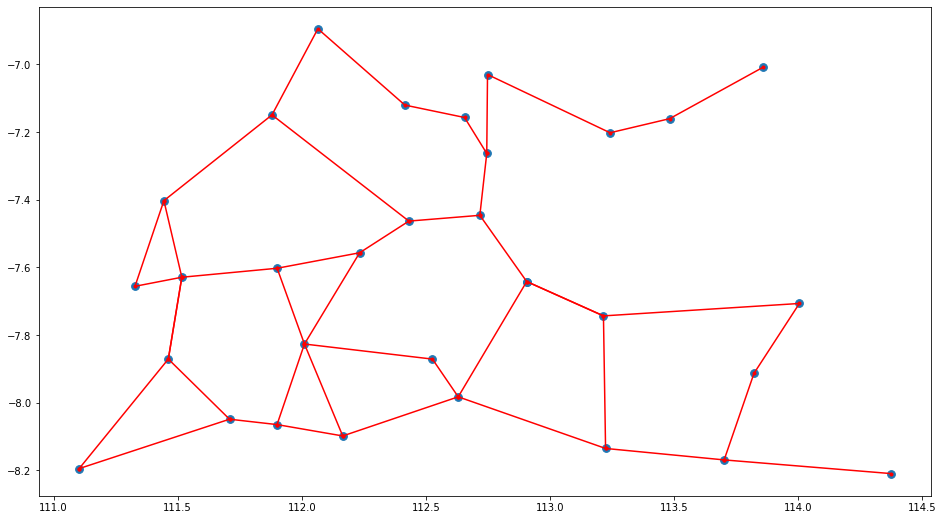

In [143]:
plt.figure(figsize=(16,9))
plt.scatter(kota['Longitude'], kota['Latitude'], s=60)
plt.plot(JalurSelatan['Longitude'],JalurSelatan['Latitude'], '-r.')
plt.plot(JalurPctSmnp['Longitude'],JalurPctSmnp['Latitude'], '-r.')
plt.plot(JalurNgTGK['Longitude'],JalurNgTGK['Latitude'], '-r.')
plt.plot(JalurMdTgl['Longitude'],JalurMdTgl['Latitude'], '-r.')
plt.plot(JalurBltMg['Longitude'],JalurBltMg['Latitude'], '-r.')
plt.plot(JalurKdrBjn['Longitude'],JalurKdrBjn['Latitude'], '-r.')
plt.plot(JalurNgjJb['Longitude'],JalurNgjJb['Latitude'], '-r.')
plt.plot(JalurMjSd['Longitude'],JalurMjSd['Latitude'], '-r.')
plt.plot(JalurSbyJb['Longitude'],JalurSbyJb['Latitude'], '-r.')
plt.plot(JalurMgLmj['Longitude'],JalurMgLmj['Latitude'], '-r.')

In [59]:
barang.loc[barang['REWARD'] == barang['REWARD'].max()]

,ID,INITIAL,GOAL,BEBAN MUATAN (TON),REWARD,JENIS
1153,1154,Kabupaten Magetan,Kabupaten Banyuwangi,45,2750000,PADAT
